## Mathematics for Machine Learning Pre-Class assignment 1 Wheat and Chessboard Problem
# Name: Nguyen Anh Hoang Phuc

## Problem 1

In [23]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("Arrange wheat on a plate of 4 squares (list)：{}".format(small_board_list))

Arrange wheat on a plate of 4 squares (list)：[1, 2, 4, 8]


In [24]:
import numpy as np
small_board_ndarray = np.array(small_board_list)
small_board_ndarray = small_board_ndarray.reshape(2,2)
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray)：[[1 2]
 [4 8]]


## Problem 2

In [25]:
def wheat_chessboard(n,m):
    wheat_list = [2**(num) for num in range(n*m)]
    wheat_ndarray = np.array(wheat_list).reshape(n,m)
    return wheat_ndarray

In [26]:
board_ndarray_8_8 = wheat_chessboard(8,8)
print("Arrange wheat on a plate of 8 squares (ndarray)：{}".format(board_ndarray_8_8))

Arrange wheat on a plate of 8 squares (ndarray)：[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+1

## Problem 3

In [39]:
total = board_ndarray_8_8.sum()
print("The total number of wheat on a chess board of 8 x 8 squares is {}".format(total))
column_avg = board_ndarray_8_8.mean(axis=0)
print("The average of each column: \n {}".format(column_avg))

The total number of wheat on a chess board of 8 x 8 squares is 1.8446744073709552e+19
The average of each column: 
 [9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


In [45]:
list(range(len(column_avg)))

[0, 1, 2, 3, 4, 5, 6, 7]

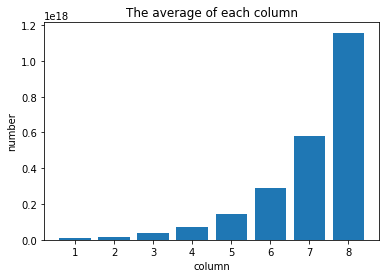

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("column")
plt.ylabel("number")
plt.title("The average of each column")
plt.bar(np.arange(1,len(column_avg)+1), column_avg)
plt.show()

## Problem 4

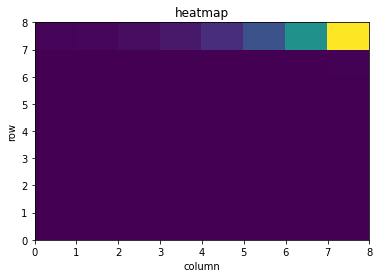

In [54]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(board_ndarray_8_8)
plt.show()

## Problem 5

In [69]:
firt_half = board_ndarray_8_8[0:4].sum()
second_half = board_ndarray_8_8[4:].sum()
ratio = second_half/firt_half
print("the number of wheat in the second half of the chessboard is greater than the number of wheat in the first half {} times".format(ratio))

the number of wheat in the second half of the chessboard is greater than the number of wheat in the first half 4294967296.0 times


## Problem 6

In [144]:
def wheat_chessboard_append(n,m):
    n_squares = n*m
    board_ndarray = np.array([]).astype(np.uint64)
    board_ndarray = np.append(board_ndarray,np.array([2**(num) for num in range(n_squares)]).astype(np.uint64))
    board_ndarray = board_ndarray.reshape(n,m)
    return board_ndarray

In [145]:
def wheat_chessboard_broadcast(n,m):
    n_squares = n*m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    board_ndarray = board_ndarray.reshape(n,m)
    return board_ndarray

In [146]:
board_ndarray_8_8_append = wheat_chessboard_append(8,8)
print("Arrange wheat on a plate of 8 squares  (ndarray) using np.append() method：{}".format(board_ndarray_8_8_append.sum()))
board_ndarray_8_8_broadcast = wheat_chessboard_broadcast(8,8)
print("Arrange wheat on a plate of 8 squares  (ndarray) using broadcast method：{}".format(board_ndarray_8_8_broadcast.sum()))

Arrange wheat on a plate of 8 squares  (ndarray) using np.append() method：18446744073709551615
Arrange wheat on a plate of 8 squares  (ndarray) using broadcast method：18446744073709551615


## Problem 7

In [150]:
%%timeit
def wheat_chessboard(n,m):
    wheat_list = [2**(num) for num in range(n*m)]
    wheat_ndarray = np.array(wheat_list).reshape(n,m)
    return wheat_ndarray
result = wheat_chessboard(8,8)

15.4 µs ± 25.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [151]:
%%timeit
def wheat_chessboard_append(n,m):
    n_squares = n*m
    board_ndarray = np.array([]).astype(np.uint64)
    board_ndarray = np.append(board_ndarray,np.array([2**(num) for num in range(n_squares)]).astype(np.uint64))
    board_ndarray = board_ndarray.reshape(n,m)
    return board_ndarray
result = wheat_chessboard_append(8,8)

19.1 µs ± 25.7 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [152]:
%%timeit
def wheat_chessboard_broadcast(n,m):
    n_squares = n*m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    board_ndarray = board_ndarray.reshape(n,m)
    return board_ndarray
result = wheat_chessboard_broadcast(8,8)

2.01 µs ± 6.24 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The first method is little bit faster than np.append() method, but the third method-broadcast method is more faster than 2 others.